# MobileNet
MobileNets are a class of small, low-latency, low-power models that can be used for classification, detection, and other commmon tasks convolutional neural networks are good for. Because of their small size, these are considered great deep learning models to be used on mobile devices.


In [158]:
import pandas as pd
import numpy as np
import os
import keras
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import plot_model
from IPython.display import Image, display

In [159]:
IMAGE_PATH = 'img/'

# Load pre-trained MobileNet network

In [160]:
mobile_net = MobileNet()

In [162]:
def process_image(img):
    # build a path to the image
    img_path = "%s%s" %(IMAGE_PATH, img)
    # make the image size applicable to mobile_net input 
    image_ = image.load_img(img_path, target_size=(224, 224))
    # load the image as an numpy array
    img_array = image.img_to_array(image_)
    # add an extra dimention to the array 
    img_array_expand_dims = np.expand_dims(img_array, axis=0)
    # Prep image for the imagenet model
    tmp_ = keras.applications.mobilenet.preprocess_input(img_array_expand_dims)
    # return the image array and the path to the image
    return tmp_, img_path

# Predict test images using MobileNet

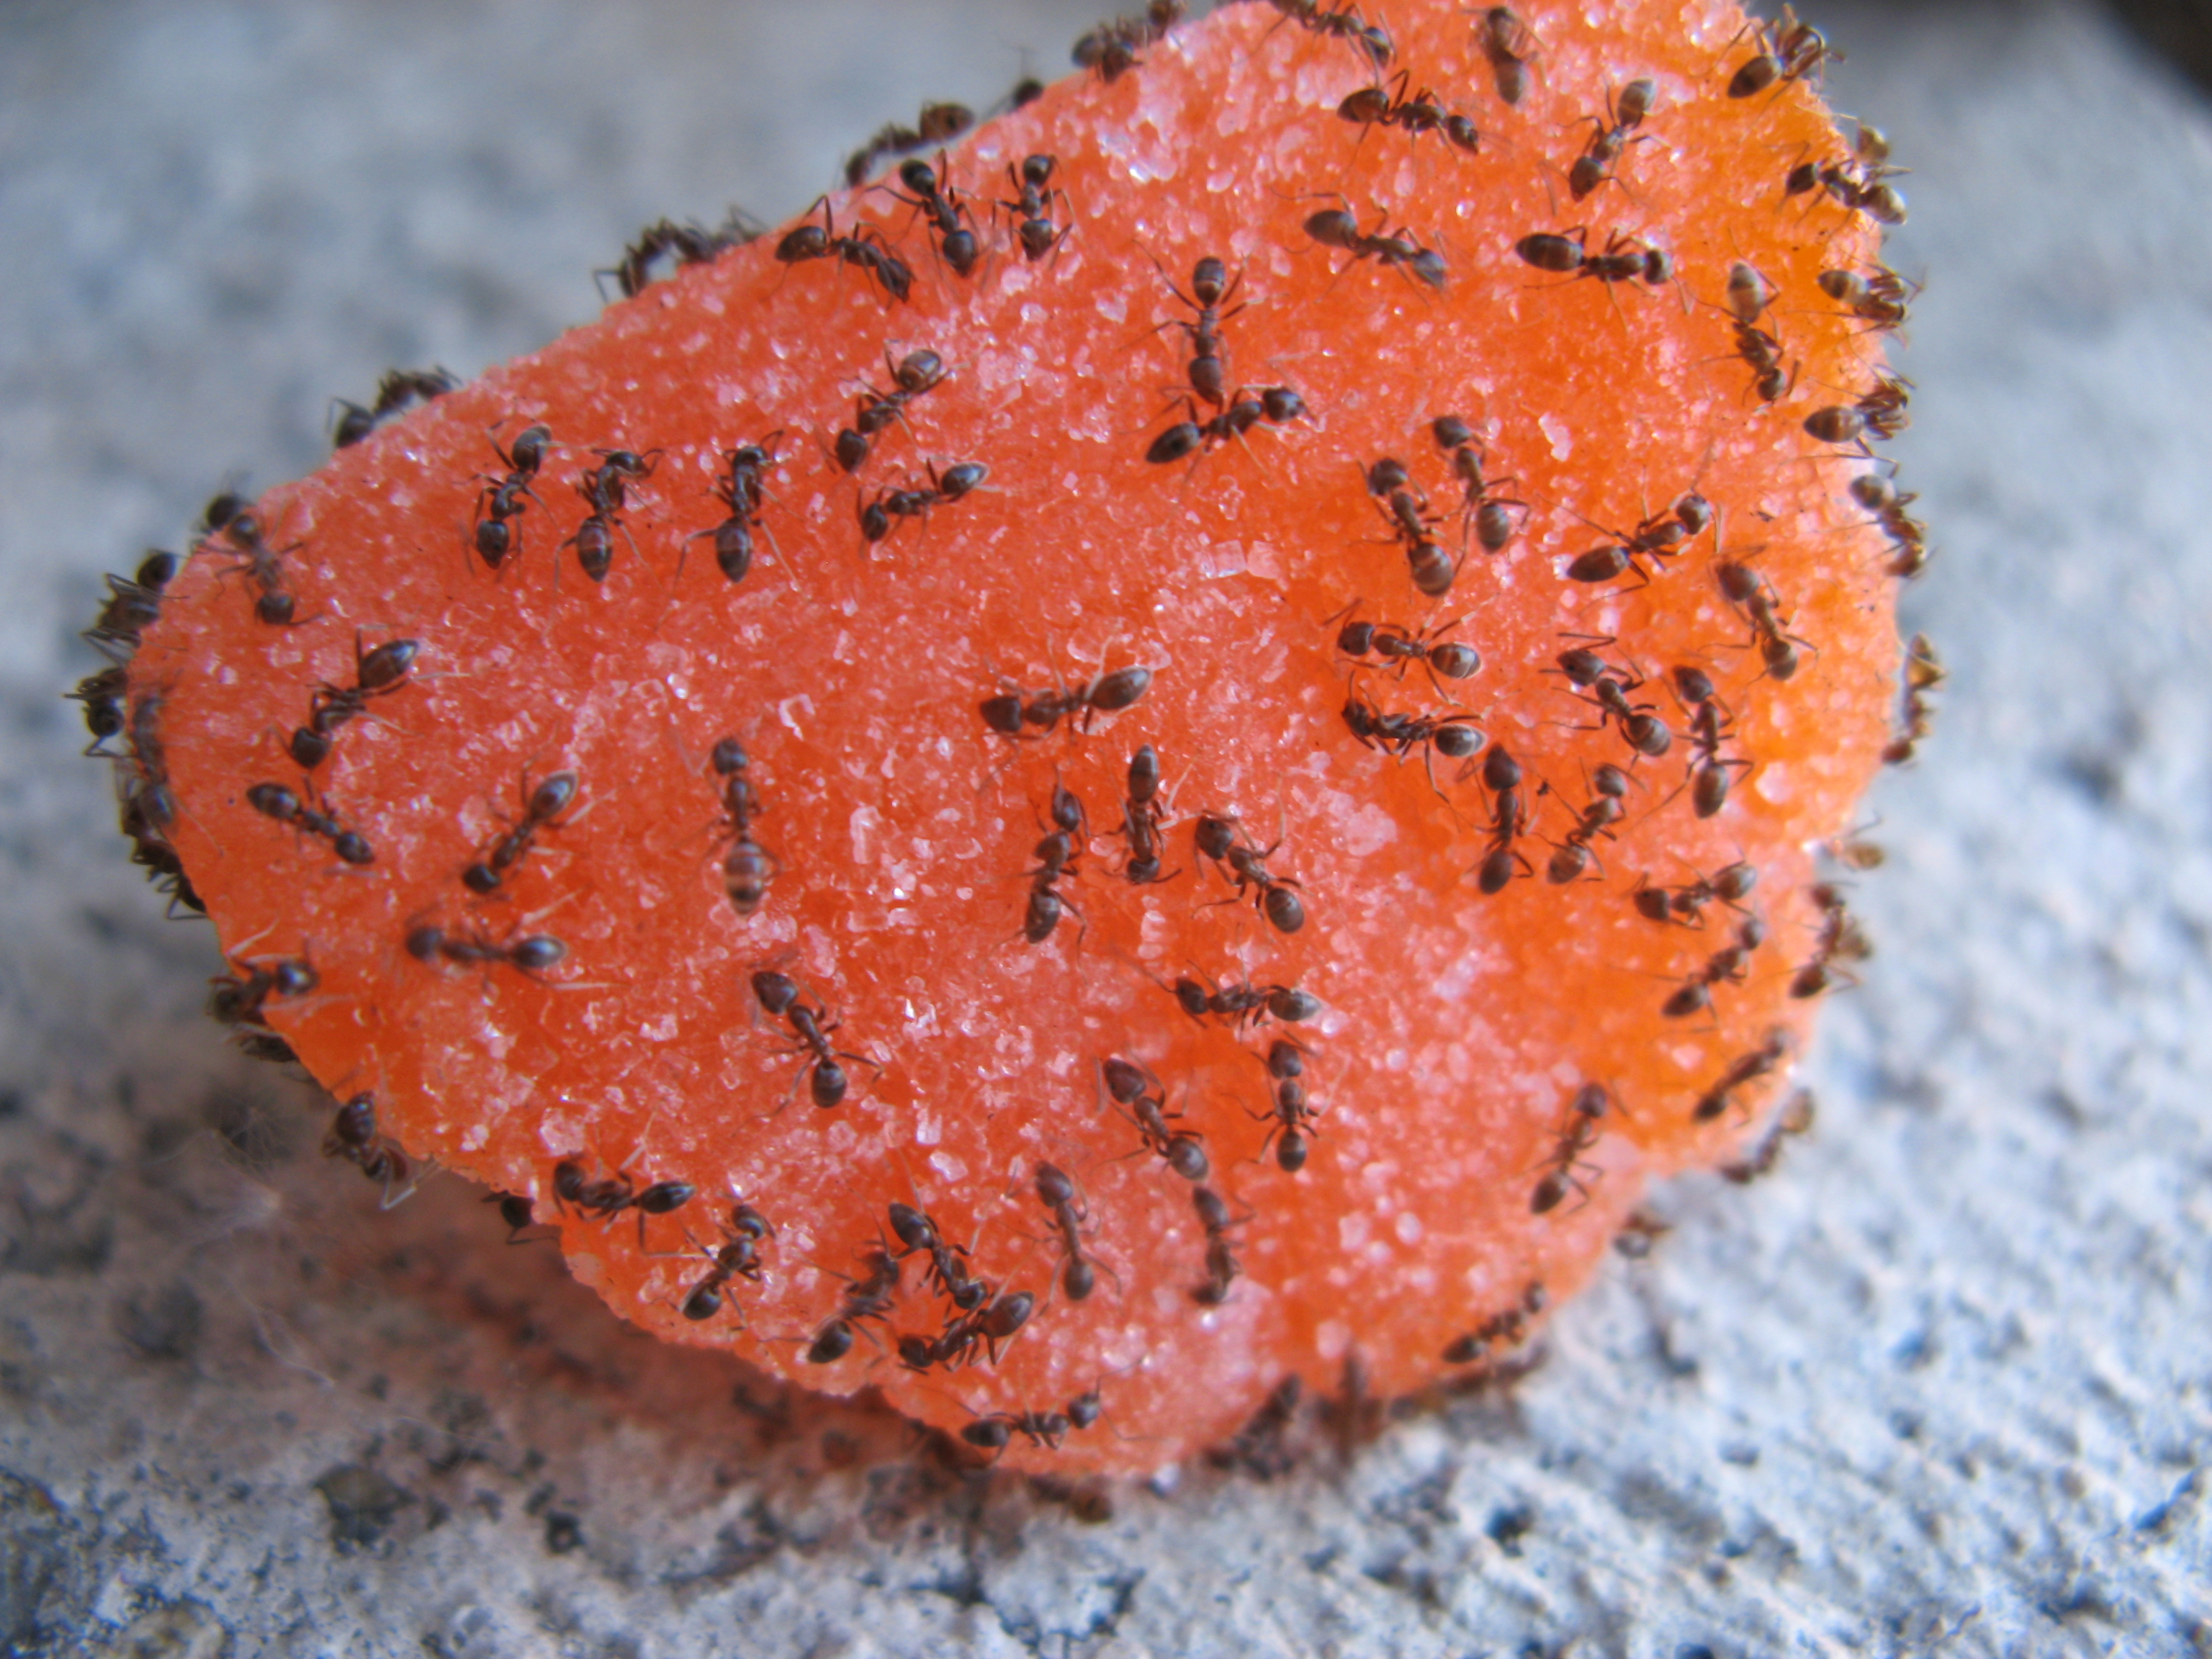

[[('n03207743', 'dishrag', 0.35588703), ('n12985857', 'coral_fungus', 0.11251182), ('n03908714', 'pencil_sharpener', 0.08423822), ('n07860988', 'dough', 0.07221814), ('n04254777', 'sock', 0.034596853), ('n13040303', 'stinkhorn', 0.030734241), ('n02317335', 'starfish', 0.024871267), ('n03314780', 'face_powder', 0.021240722), ('n07717556', 'butternut_squash', 0.020189771), ('n02219486', 'ant', 0.01660535)]]


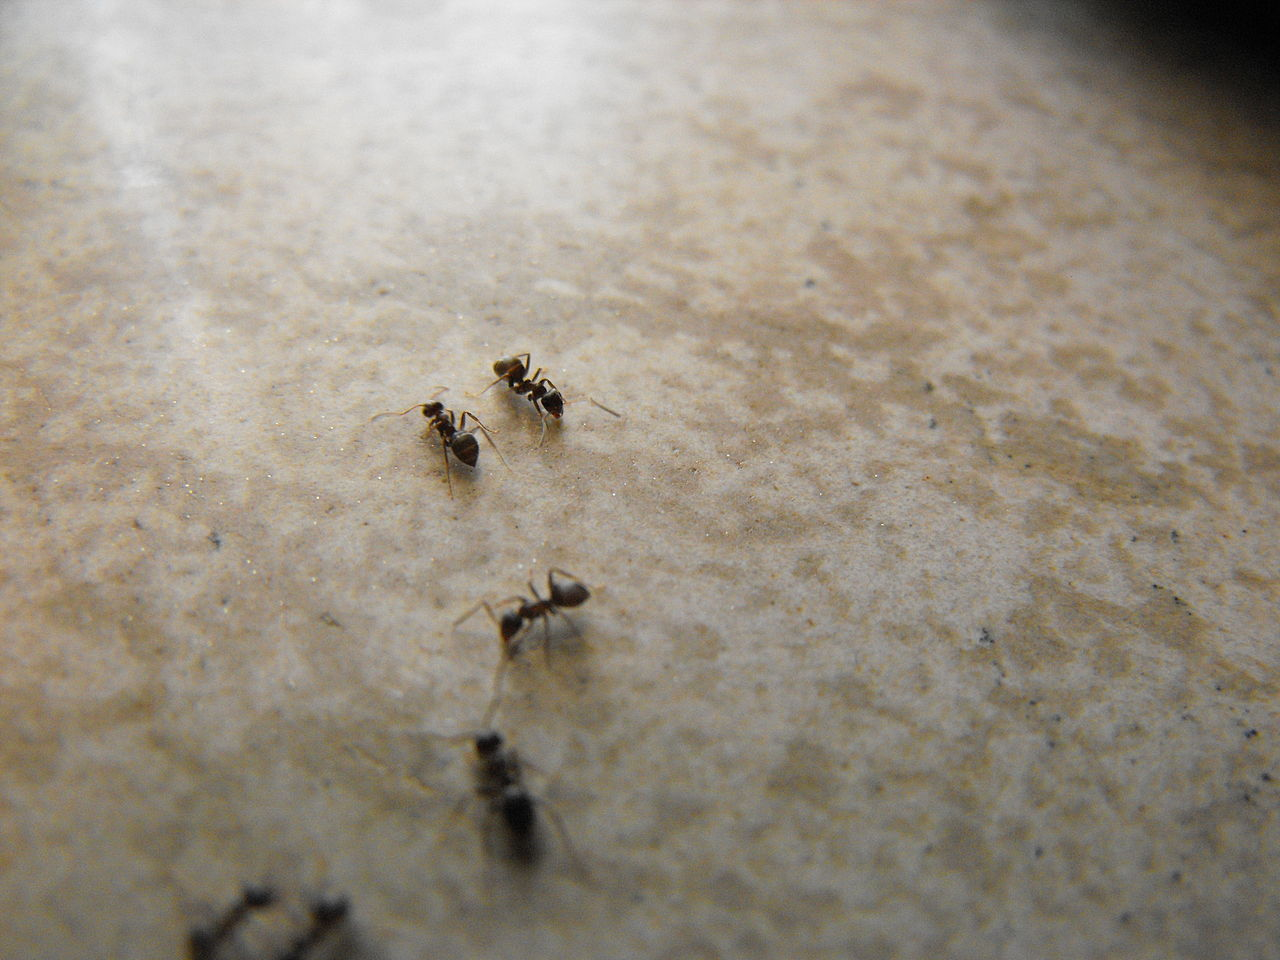

[[('n02219486', 'ant', 0.8955154), ('n01776313', 'tick', 0.019205915), ('n01774750', 'tarantula', 0.01917952), ('n01770393', 'scorpion', 0.014520727), ('n01986214', 'hermit_crab', 0.009668296), ('n02727426', 'apiary', 0.0040708096), ('n01774384', 'black_widow', 0.0039390186), ('n01775062', 'wolf_spider', 0.0030820854), ('n03729826', 'matchstick', 0.0027423957), ('n02177972', 'weevil', 0.0021807072)]]


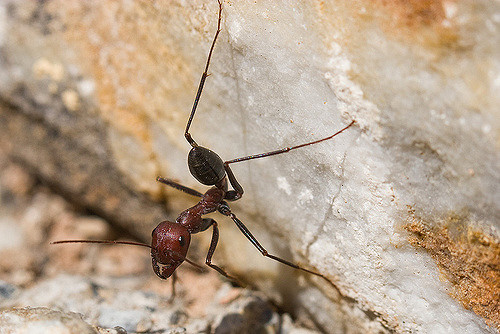

[[('n02219486', 'ant', 0.9174174), ('n01773549', 'barn_spider', 0.019599682), ('n01773157', 'black_and_gold_garden_spider', 0.011193077), ('n01775062', 'wolf_spider', 0.010811746), ('n01774384', 'black_widow', 0.0081475405), ('n01773797', 'garden_spider', 0.0080300495), ('n01770081', 'harvestman', 0.0063692653), ('n02165105', 'tiger_beetle', 0.004639483), ('n02229544', 'cricket', 0.0025235114), ('n01770393', 'scorpion', 0.0022721624)]]


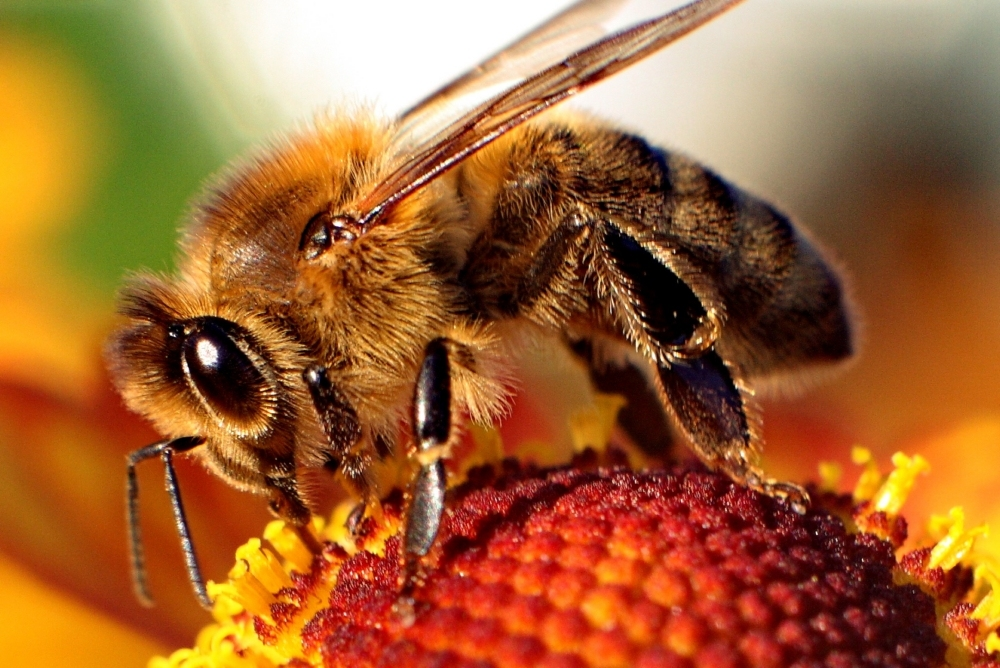

[[('n02206856', 'bee', 0.99618596), ('n01774750', 'tarantula', 0.0011141341), ('n02219486', 'ant', 0.00067480654), ('n01775062', 'wolf_spider', 0.00040782974), ('n02190166', 'fly', 0.00031674877), ('n01986214', 'hermit_crab', 0.00029618622), ('n02268443', 'dragonfly', 0.00023381866), ('n12620546', 'hip', 0.00012992104), ('n02281406', 'sulphur_butterfly', 7.2652256e-05), ('n03794056', 'mousetrap', 5.961707e-05)]]


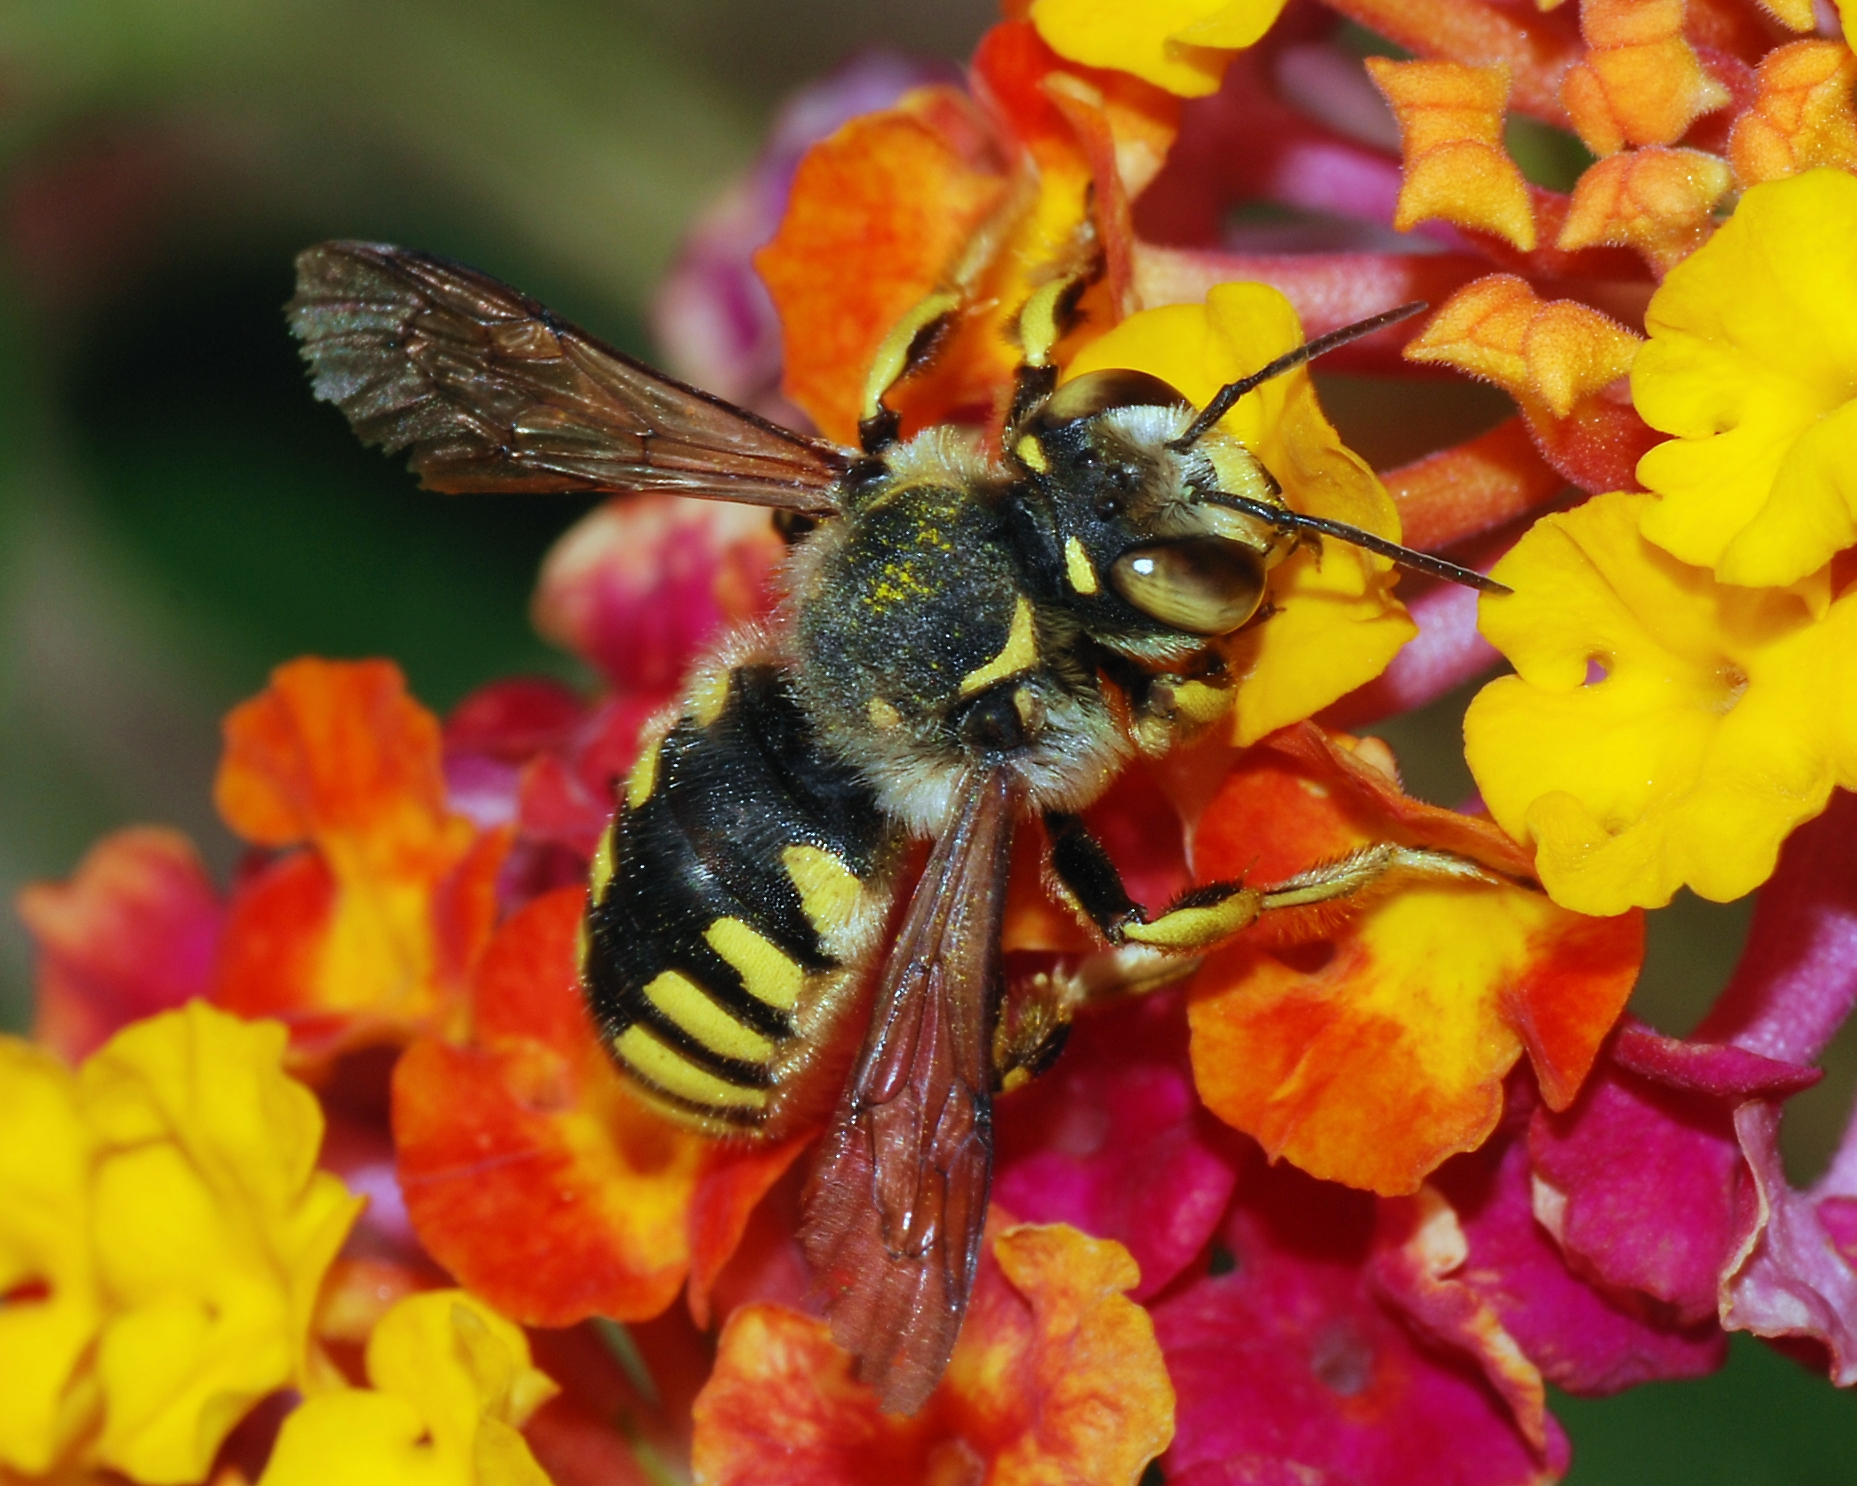

[[('n02206856', 'bee', 0.8729006), ('n02190166', 'fly', 0.09245109), ('n02168699', 'long-horned_beetle', 0.020140082), ('n02268443', 'dragonfly', 0.006143831), ('n02264363', 'lacewing', 0.0033030424), ('n02256656', 'cicada', 0.0014173527), ('n02276258', 'admiral', 0.0011705718), ('n02229544', 'cricket', 0.00064075156), ('n02177972', 'weevil', 0.00046106733), ('n02165105', 'tiger_beetle', 0.00026312345)]]


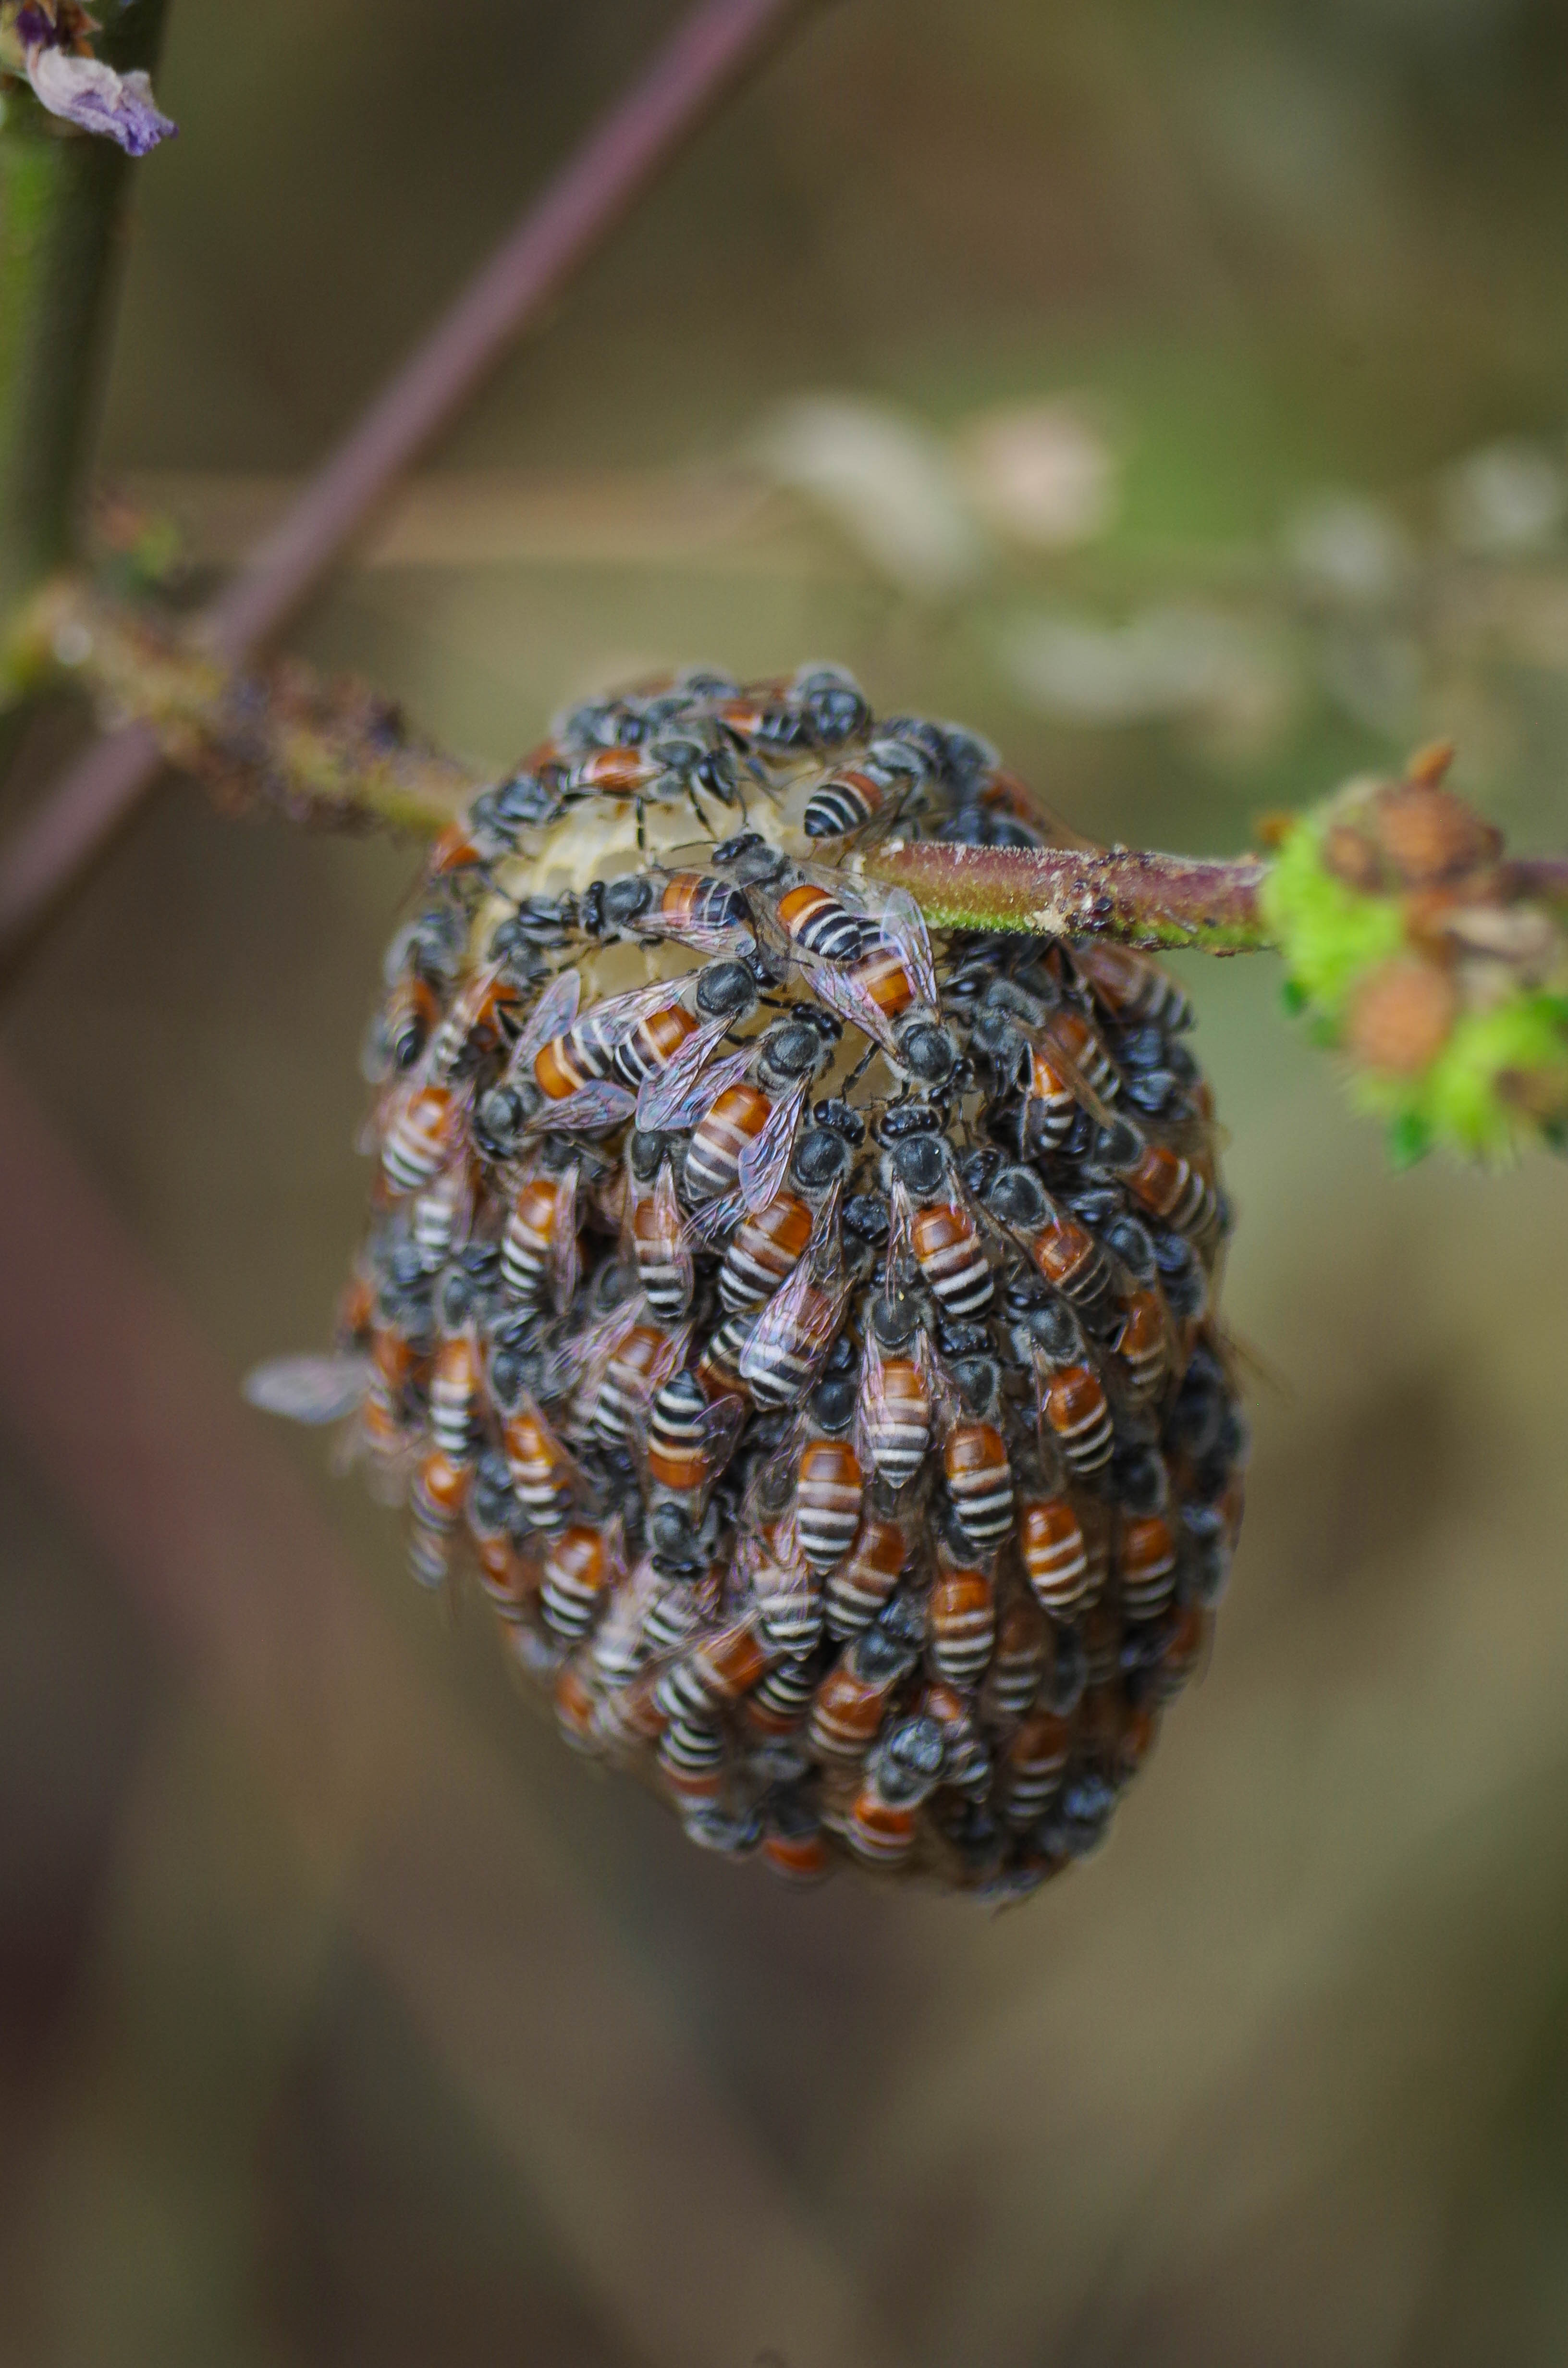

[[('n07753275', 'pineapple', 0.30469537), ('n12267677', 'acorn', 0.20372602), ('n02319095', 'sea_urchin', 0.093372785), ('n03530642', 'honeycomb', 0.0557641), ('n02206856', 'bee', 0.046857968), ('n04286575', 'spotlight', 0.041337423), ('n03627232', 'knot', 0.03295301), ('n07760859', 'custard_apple', 0.025001211), ('n01775062', 'wolf_spider', 0.0233802), ('n03089624', 'confectionery', 0.01637363)]]


In [170]:
# predict all the test images 
for filename in os.listdir(os.getcwd() + "/img"):
    fname, ext = os.path.splitext(filename)
    if not (ext == '.jpg'):
        continue
    img, img_path = process_image(filename)
    dimage = Image(img_path, width=300, height=200)
    display(dimage)
    pred = mobile_net.predict(img)
    print(imagenet_utils.decode_predictions(pred, top=10))

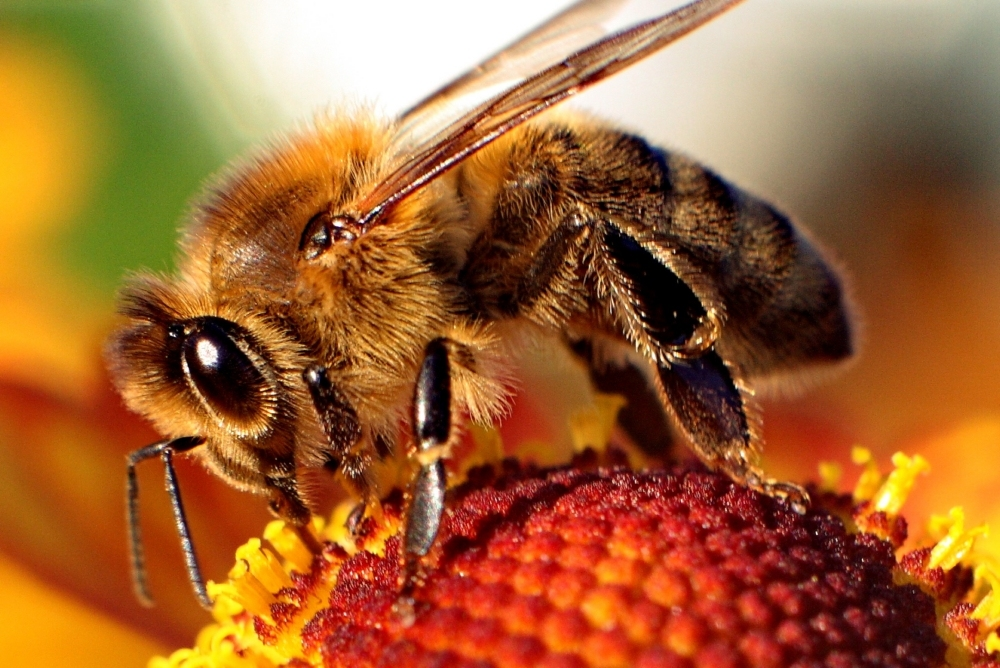

In [171]:
Image("img/test2.jpg", width=300, height=200)